In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 
import matplotlib.patches as mpatches

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# checking for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].unique()

array([0, 1])

In [7]:
print(data['Class'].value_counts()[0], 'is the legit transactions. Which is ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset.')
print(data['Class'].value_counts()[1], 'is the fraud transactions. Which is ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset.')

284315 is the legit transactions. Which is  99.83 % of the dataset.
492 is the fraud transactions. Which is  0.17 % of the dataset.


In [8]:
# Separate data for further analysis

legit_data = data[data.Class == 0]
fraud_data = data[data.Class == 1]

# print(legit_data.shape)
# print(fraud_data.shape)

In [9]:
# Compare the values for both transaction

legit_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

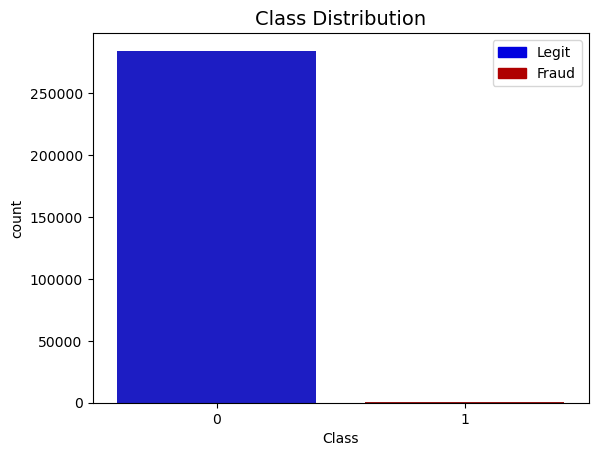

In [11]:
# visualizing the unbalance data using a barplot.

colors = ['#0101DF', '#AF0000']
sn.countplot(x='Class', data=data, palette=colors)
plt.title('Class Distribution', fontsize=14)
legit = mpatches.Patch(color='#0101DF', label='Legit')
fraud = mpatches.Patch(color='#AF0000', label='Fraud')
plt.legend(handles=[legit, fraud])

In [12]:
# Building sample dataset

legit_sample = legit_data.sample(n=492)
new_data = pd.concat([legit_sample, fraud_data], axis=0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152512,97397.0,1.978211,-0.553045,-0.216517,0.323216,-0.491050,0.351286,-1.032546,0.093793,2.752312,...,-0.154192,-0.158080,0.259409,0.041610,-0.532123,0.447783,-0.052526,-0.039695,39.00,0
62579,50326.0,0.142218,-3.479734,0.032682,-0.707778,-2.172412,0.981623,-0.805196,0.276365,-1.207461,...,0.300545,0.091916,-0.579335,-0.256348,0.150207,-0.006061,-0.039576,0.106104,634.75,0
83581,59926.0,-0.362823,1.278190,1.555715,1.751200,0.543661,-0.126851,0.912193,-0.056590,-1.388092,...,-0.129509,-0.479431,0.048088,-0.158681,-0.548471,-0.351708,0.135379,0.168875,26.34,0
77873,57255.0,1.222167,-0.764161,0.022165,-0.856479,-0.687740,-0.270768,-0.461369,0.098741,-1.005828,...,-0.204934,-0.993919,0.147241,-0.389265,0.056159,-0.612492,-0.019905,0.011195,80.91,0
82516,59435.0,-1.045795,0.938254,1.264141,0.538993,0.339745,-0.395010,0.712619,-0.332071,-0.070783,...,-0.257397,-0.348493,0.236586,0.037106,-0.629582,0.150546,-0.236591,-0.022496,16.68,0


In [13]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [14]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Distribution of the Classes in the new dataset
0    0.5
1    0.5
Name: Class, dtype: float64


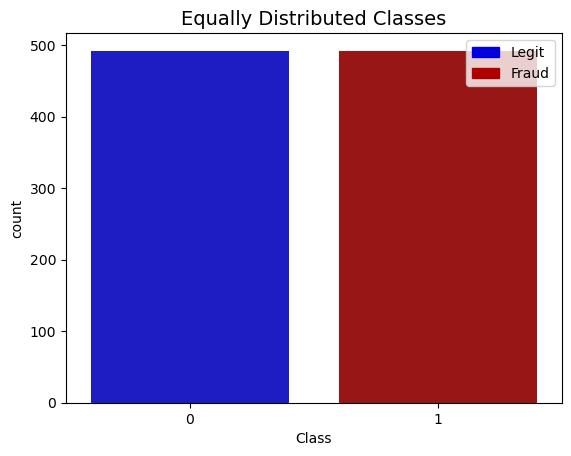

In [15]:
print('Distribution of the Classes in the new dataset')
print(new_data['Class'].value_counts()/len(new_data))



sn.countplot(x='Class', data=new_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.legend(handles=[legit, fraud])
plt.show()

Text(0.5, 1.0, 'New data correlation matrix')

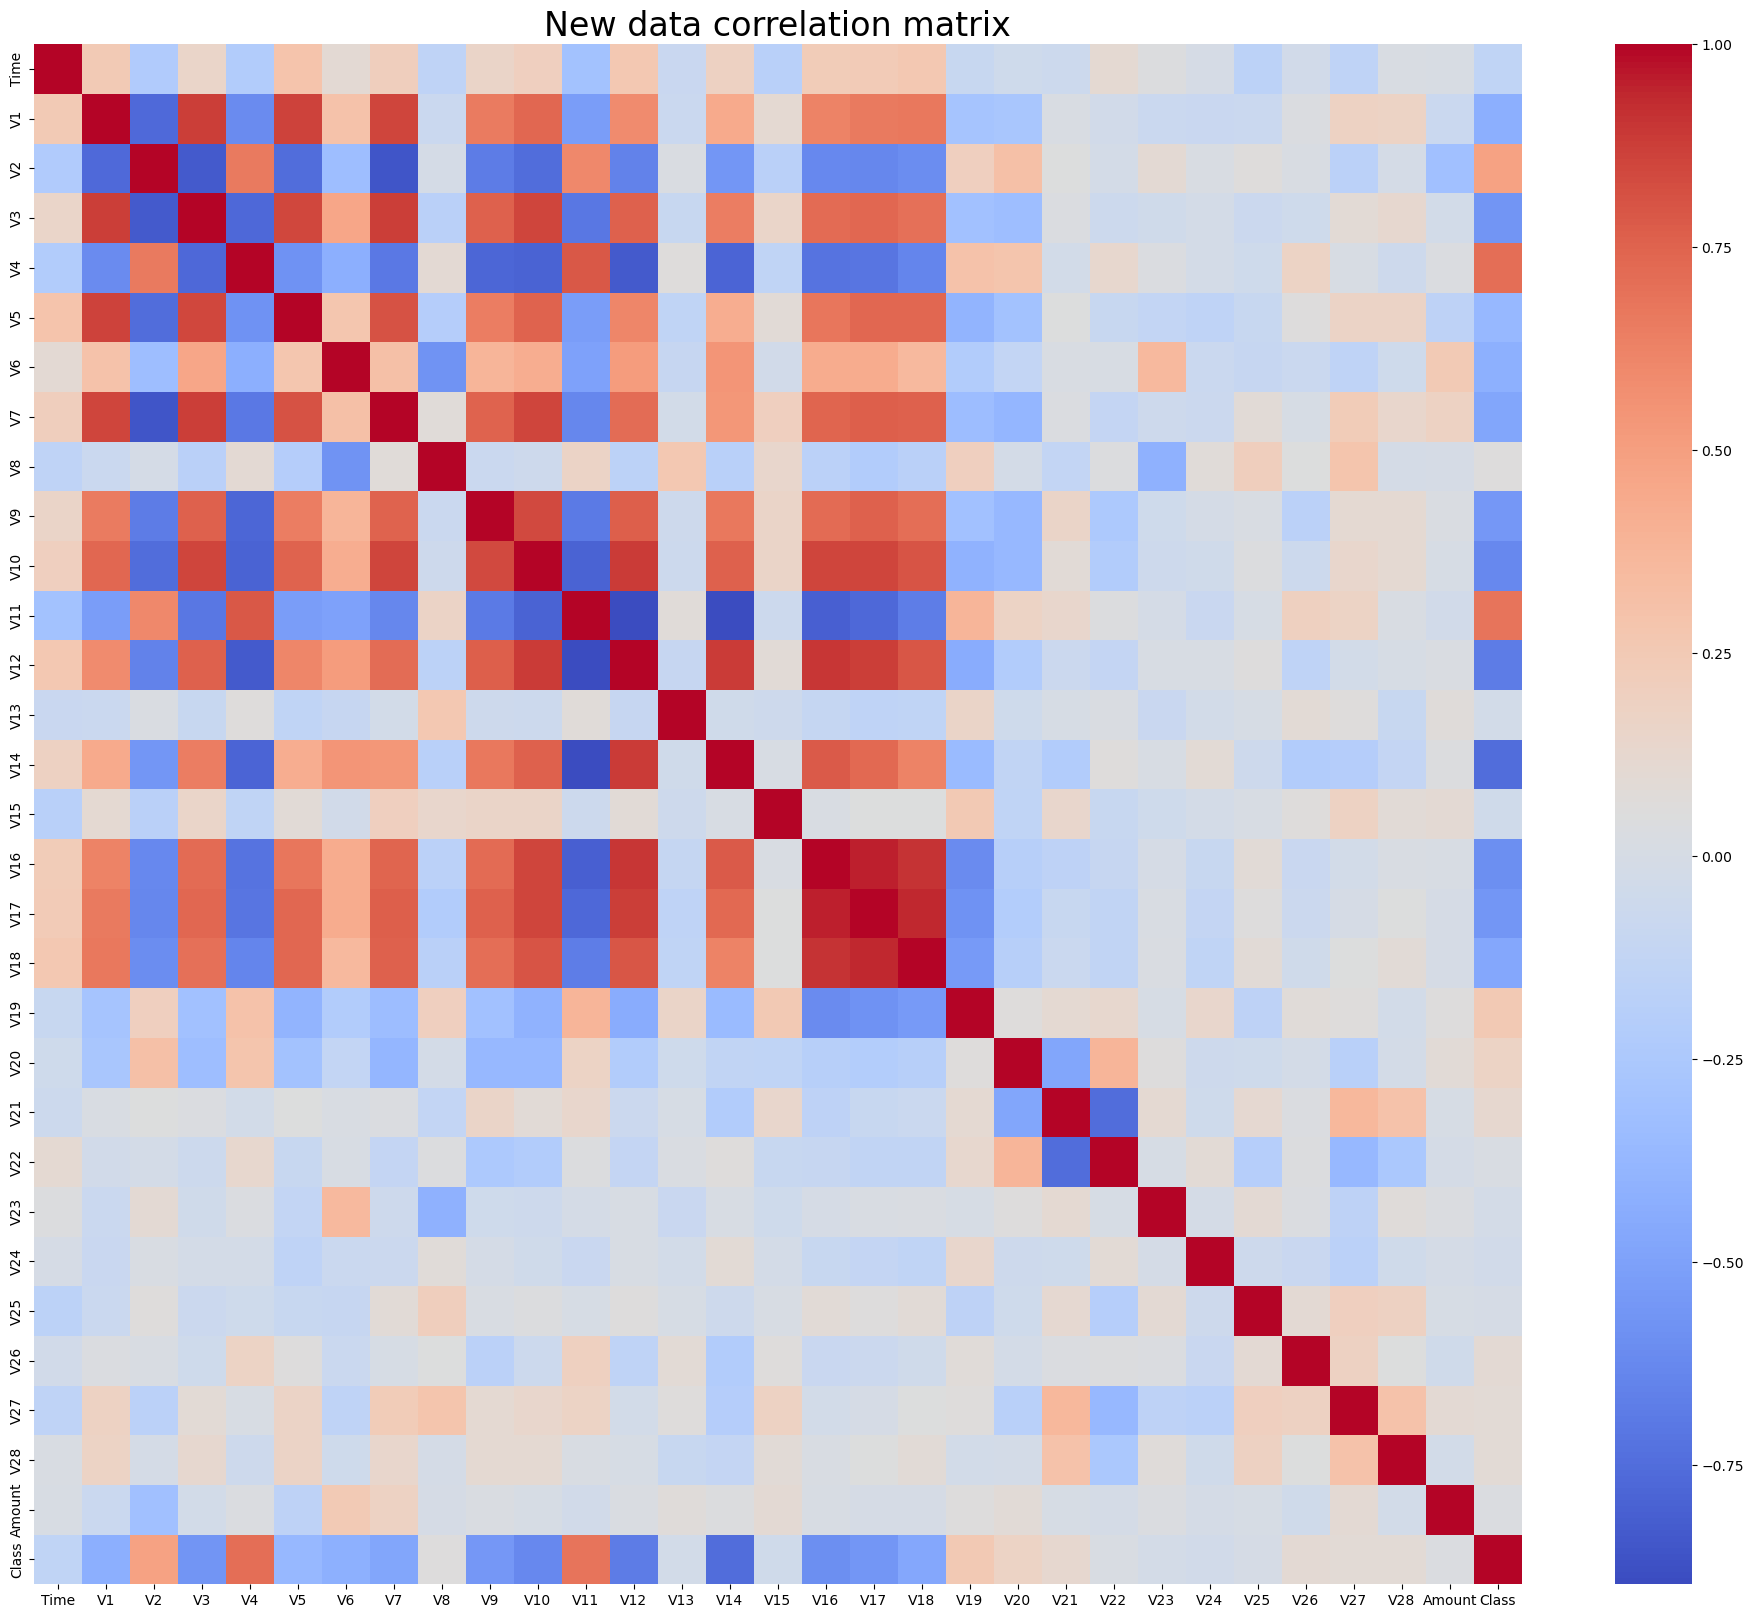

In [16]:
# Building correlation matrices

fig, ax = plt.subplots(figsize=(24,20))

corrMatrix = new_data.corr()
sn.heatmap(corrMatrix, cmap='coolwarm', ax=ax)
plt.title('New data correlation matrix', fontsize=24)

In [17]:
# Splitting the data into features and target

X = new_data.drop('Class', axis=1)
Y = new_data['Class']

In [18]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
152512   97397.0  1.978211 -0.553045 -0.216517  0.323216 -0.491050  0.351286   
62579    50326.0  0.142218 -3.479734  0.032682 -0.707778 -2.172412  0.981623   
83581    59926.0 -0.362823  1.278190  1.555715  1.751200  0.543661 -0.126851   
77873    57255.0  1.222167 -0.764161  0.022165 -0.856479 -0.687740 -0.270768   
82516    59435.0 -1.045795  0.938254  1.264141  0.538993  0.339745 -0.395010   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [19]:
print(Y)

152512    0
62579     0
83581     0
77873     0
82516     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [20]:
# train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [21]:
# Using cross validation to check for models accuracy

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier()
}

In [22]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    training_score = cross_val_score(classifier, X_train, Y_train, cv=5)
    print(classifier.__class__.__name__, ": ", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression :  94.0 % accuracy score
SVC :  53.0 % accuracy score
DecisionTreeClassifier :  90.0 % accuracy score
KNeighborsClassifier :  62.0 % accuracy score


In [29]:
# Best params selection for logistic regression with GridSearchCV
from sklearn.model_selection import GridSearchCV

def grid_search():
    
    n = 20
    C_values = np.linspace(0.01, 1, n)
    penalty = ['l1', 'l2']
    grid_search_values = dict(penalty = penalty, C = C_values)
    
    log_reg = LogisticRegression()
    grid = GridSearchCV(log_reg, param_grid = grid_search_values, scoring = 'recall')
    grid.fit(X_train, Y_train)
    
    scores = grid.cv_results_['mean_test_score']
    scores = scores.reshape(n,2)
    
    best_params = grid.best_params_
    
    return (scores, best_params)

scores = grid_search()
best_params = scores[1]
scores = scores[0]

In [30]:
print('Best parameters obtained in the grid search:')
print('Penalty = {:.3}'.format(best_params['penalty'])) 
print('C = {:.3}'.format(best_params['C']))

Best parameters obtained in the grid search:
Penalty = l2
C = 0.166


In [31]:
# Using the best params from GridSearchCV to build the logistic regression

log_reg = LogisticRegression(penalty = best_params['penalty'], C = best_params['C'])
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
Y_score = log_reg.decision_function(X_test)

fpr, tpr, _ = roc_curve(Y_test, Y_score)
roc_auc = auc(fpr, tpr)
accuracy = log_reg.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print('Area under ROC: {:.2}'.format(roc_auc))
print('Accuracy: {:.2}'.format(accuracy))
print('Precision: {:.2}'.format(precision))
print('Recall: {:.2}'.format(recall))

Area under ROC: 0.96
Accuracy: 0.93
Precision: 0.95
Recall: 0.91


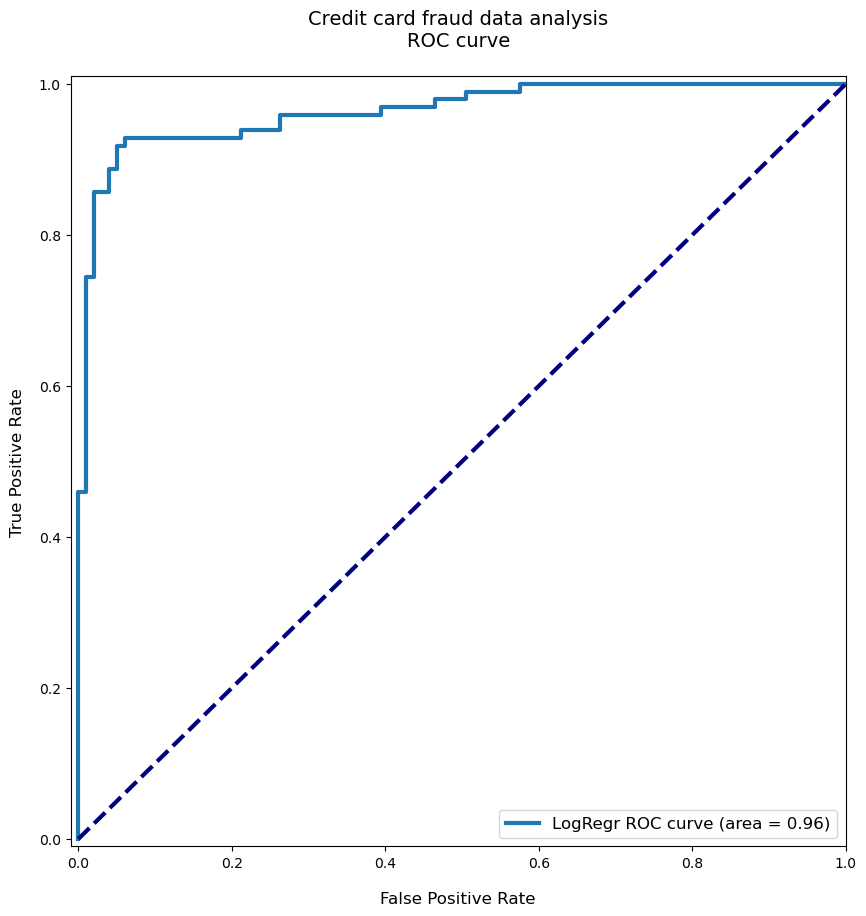

In [34]:
# Plotting ROC curve

plt.figure(figsize=(10,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', labelpad=15, fontsize = 12)
plt.ylabel('True Positive Rate', labelpad=10, fontsize = 12)
plt.title('Credit card fraud data analysis\nROC curve\n', fontsize = 14)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()